# Problem Statement
### Predicting Employee Attrition    

In recent years, attention has increasingly been paid to human resources (HR), since worker quality and skills represent a growth factor and a real competitive advantage for companies. After proving its mettle in sales and marketing, artificial intelligence is also becoming central to employee-related decisions within HR management. Organizational growth largely depends on staff retention. Losing employees frequently impacts the morale of the organization and hiring new employees is more expensive than retaining existing ones. 

You are working as a data scientist with HR Department of a large insurance company focused on sales team attrition. Insurance sales teams help insurance companies generate new business by contacting potential customers and selling one or more types of insurance. The department generally sees high attrition and thus staffing becomes a crucial aspect. 

To aid staffing, you are provided with the monthly information for a segment of employees for 2016 and 2017 and tasked to predict whether a current employee will be leaving the organization in the upcoming two quarters (01 Jan 2018 - 01 July 2018) or not, given:


1. Demographics of the employee (city, age, gender etc.)
2. Tenure information (joining date, Last Date)
3. Historical data regarding the performance of the employee (Quarterly rating, Monthly business acquired, designation, salary)

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

In [2]:
test_df= pd.read_csv('/kaggle/input/jobathon-2021-analytics-vidya/test.csv')
df= pd.read_csv('../input/jobathon-2021-analytics-vidya/train.csv')
print('Lets check test dataframe')
display(test_df.sample(2))
print('Train dataframe')
df

Lets check test dataframe


,Emp_ID
419,648
404,1956


Train dataframe


,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2


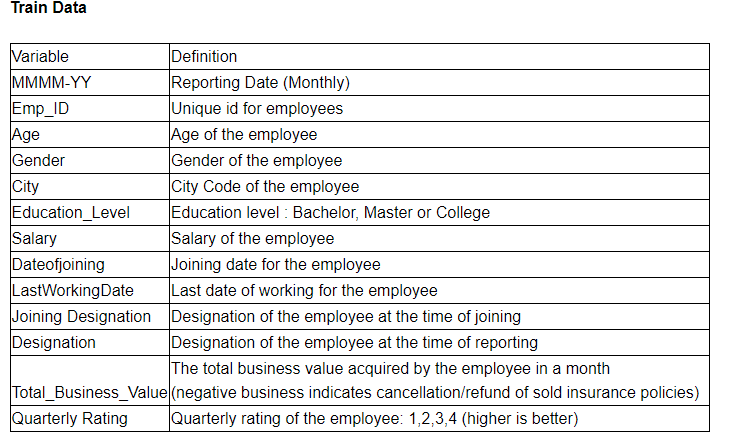

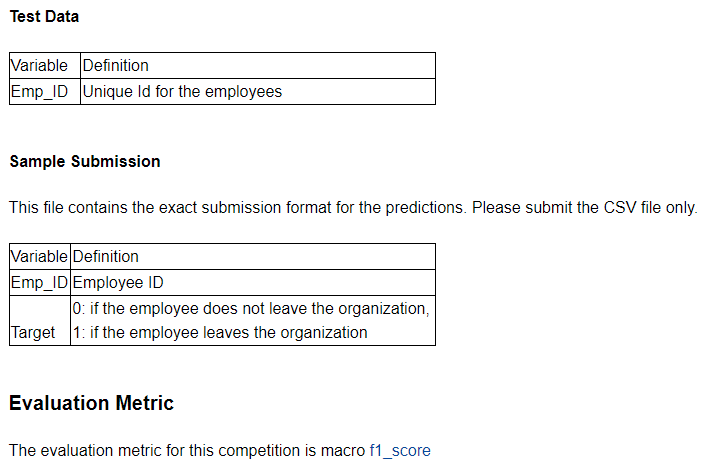

In [3]:
df.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [4]:
## Checking for distribution of target variable
df.LastWorkingDate.isnull().mean()*100

91.54103852596315

## This turn out to be problem of **imbalanced dataset** 91.5:8.5 ( i.e 8.5% Employee Attrition)
Lets explore why

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [6]:
df.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [7]:
# Lets replace NaN in LastWorkingDate with a as this is object data type
temp= df.fillna(0)
Attrition_df =temp[temp['LastWorkingDate']!= 0]
adf= Attrition_df.copy()
adf

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1
20,2017-11-01,8,34,Male,C2,College,70656,2017-09-19,2017-11-15,3,3,0,1
27,2016-12-01,12,35,Male,C23,Master,28116,2016-06-29,2016-12-21,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19039,2017-02-01,2779,28,Male,C26,College,95133,2017-01-26,2017-02-14,3,3,0,1
19054,2016-08-01,2782,26,Male,C19,Bachelor,29582,2016-05-16,2016-08-16,1,1,0,1
19081,2017-10-01,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1
19090,2016-09-01,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,0,1


### Actually there are 2787 employees out of which 1616 have Attrition

In [8]:
a,b= df.shape
df['Attrition']=0
for i in range(a):
    if temp['LastWorkingDate'][i]==0:
        df['Attrition'][i]=0
    else:
        df['Attrition'][i]=1
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3,0
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3,0
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2,0
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2,0


In [9]:
df.select_dtypes('object').columns

Index(['MMM-YY', 'Gender', 'City', 'Education_Level', 'Dateofjoining',
       'LastWorkingDate'],
      dtype='object')

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

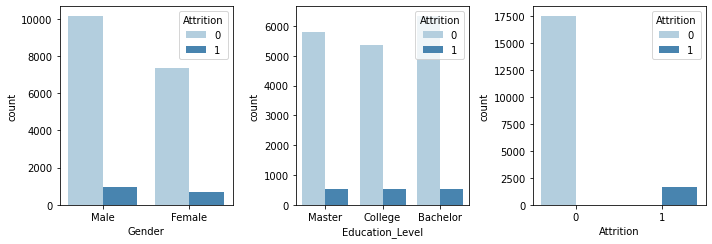

In [11]:
col = ['Gender', 'Education_Level' ,'Attrition']
j=1
plt.figure(figsize=(10,3.5))
for i in col:
    plt.subplot(1,3,j)
    sns.countplot(i, data=df, palette='Blues', hue='Attrition')
    j=j+1
    plt.tight_layout()

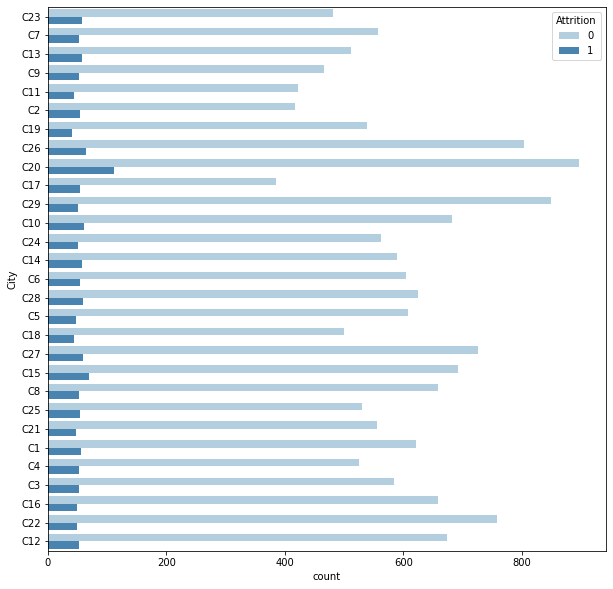

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(y='City', data=df, palette='Blues', hue='Attrition');

In [13]:
num= df.select_dtypes('number').drop('Emp_ID', axis=1)
num.sample(5)

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition
9342,32,68259,3,3,544770,2,0
16925,23,38169,1,1,297320,2,0
14538,40,50801,1,1,572310,3,0
4885,31,42243,1,1,1395190,3,0
10105,49,31555,2,2,309830,3,0


In [14]:
num =['Age', 'Salary', 'Joining Designation', 'Designation',
       'Total Business Value', 'Quarterly Rating']

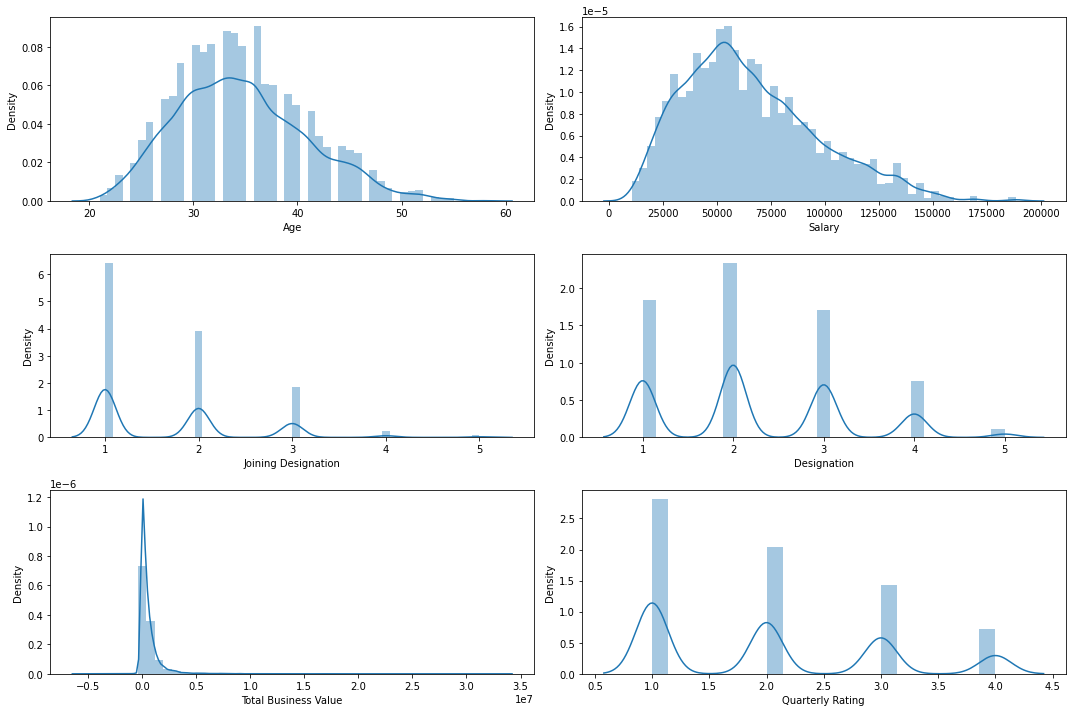

In [15]:
j=1
plt.figure(figsize=(15,10))
for i in num:
    plt.subplot(3,2,j)
    sns.distplot(df[i])
    #sns.displot(data=df, x=i, hue="Attrition", multiple="stack")
    j=j+1
    plt.tight_layout()
plt.show()

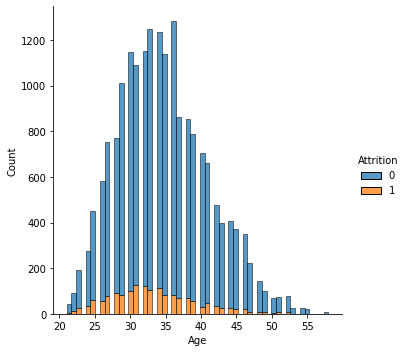

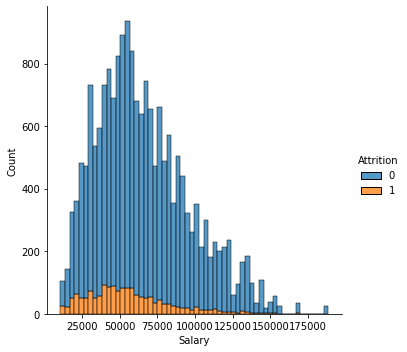

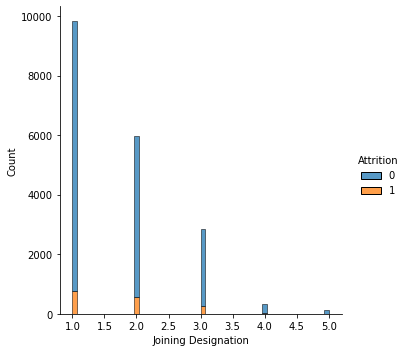

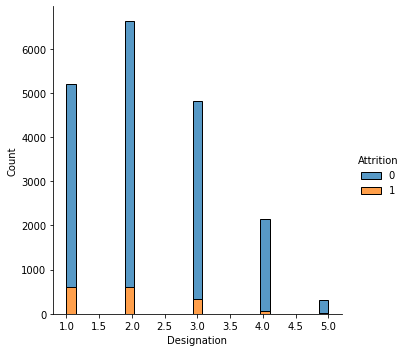

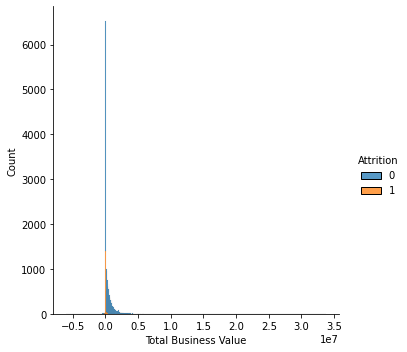

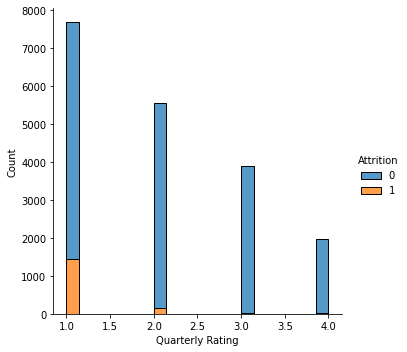

In [16]:
for i in num:
    #sns.displot(data=df, x=i, hue="Attrition", multiple="stack", palette='Blues')
    sns.displot(data=df, x=i, hue="Attrition", multiple="stack")
    plt.show()

In [17]:
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3,0
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3,0
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2,0
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2,0


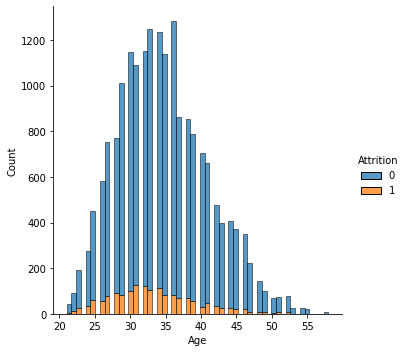

In [18]:
sns.displot(data=df, x="Age", hue="Attrition", multiple="stack")

## Looking for outliers


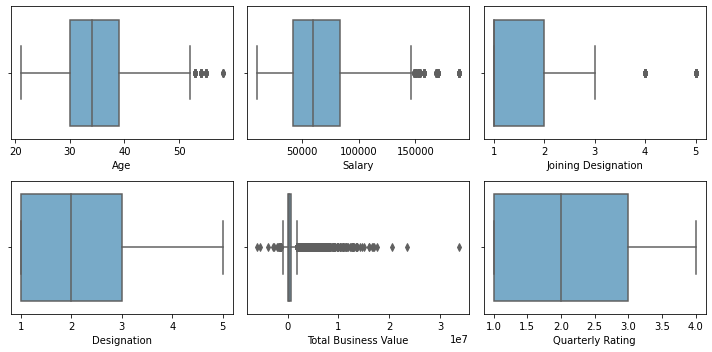

In [19]:
j=1
plt.figure(figsize=(10,5))
for i in num:
    plt.subplot(2,3,j)
    sns.boxplot(data=df, x=i, palette='Blues')
    j=j+1
    plt.tight_layout()

In [20]:
df.head(50)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,0
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,0
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,0
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,350000,1,0
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,1


## Feature engineering

In [21]:
df.head(2)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0


In [22]:
df['MMM-YY']=  pd.to_datetime(df['MMM-YY'], infer_datetime_format=True)
df['Dateofjoining']=  pd.to_datetime(df['Dateofjoining'], infer_datetime_format=True)
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], infer_datetime_format=True)

In [23]:
obj_df=df.select_dtypes(include=['object']).copy()

In [24]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["city_code"] = ord_enc.fit_transform(df[["City"]])
df["Education_Level_code"] = ord_enc.fit_transform(df[["Education_Level"]])
df.drop(columns={'City','Education_Level' }, axis=1, inplace=True)
df

,MMM-YY,Emp_ID,Age,Gender,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition,city_code,Education_Level_code
0,2016-01-01,1,28,Male,57387,2015-12-24,NaT,1,1,2381060,2,0,15.0,2.0
1,2016-02-01,1,28,Male,57387,2015-12-24,NaT,1,1,-665480,2,0,15.0,2.0
2,2016-03-01,1,28,Male,57387,2015-12-24,2016-03-11,1,1,0,2,1,15.0,2.0
3,2017-11-01,2,31,Male,67016,2017-11-06,NaT,2,2,0,1,0,26.0,2.0
4,2017-12-01,2,31,Male,67016,2017-11-06,NaT,2,2,0,1,0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,70254,2017-06-08,NaT,2,2,740280,3,0,19.0,2.0
19100,2017-09-01,2788,30,Male,70254,2017-06-08,NaT,2,2,448370,3,0,19.0,2.0
19101,2017-10-01,2788,30,Male,70254,2017-06-08,NaT,2,2,0,2,0,19.0,2.0
19102,2017-11-01,2788,30,Male,70254,2017-06-08,NaT,2,2,200420,2,0,19.0,2.0


In [25]:
df

,MMM-YY,Emp_ID,Age,Gender,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition,city_code,Education_Level_code
0,2016-01-01,1,28,Male,57387,2015-12-24,NaT,1,1,2381060,2,0,15.0,2.0
1,2016-02-01,1,28,Male,57387,2015-12-24,NaT,1,1,-665480,2,0,15.0,2.0
2,2016-03-01,1,28,Male,57387,2015-12-24,2016-03-11,1,1,0,2,1,15.0,2.0
3,2017-11-01,2,31,Male,67016,2017-11-06,NaT,2,2,0,1,0,26.0,2.0
4,2017-12-01,2,31,Male,67016,2017-11-06,NaT,2,2,0,1,0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,70254,2017-06-08,NaT,2,2,740280,3,0,19.0,2.0
19100,2017-09-01,2788,30,Male,70254,2017-06-08,NaT,2,2,448370,3,0,19.0,2.0
19101,2017-10-01,2788,30,Male,70254,2017-06-08,NaT,2,2,0,2,0,19.0,2.0
19102,2017-11-01,2788,30,Male,70254,2017-06-08,NaT,2,2,200420,2,0,19.0,2.0


In [26]:
df.Gender.replace(["Male",'Female'],[1,0], inplace=True)

# Find correlation between Total business vs Quarterly Rating + Attrition

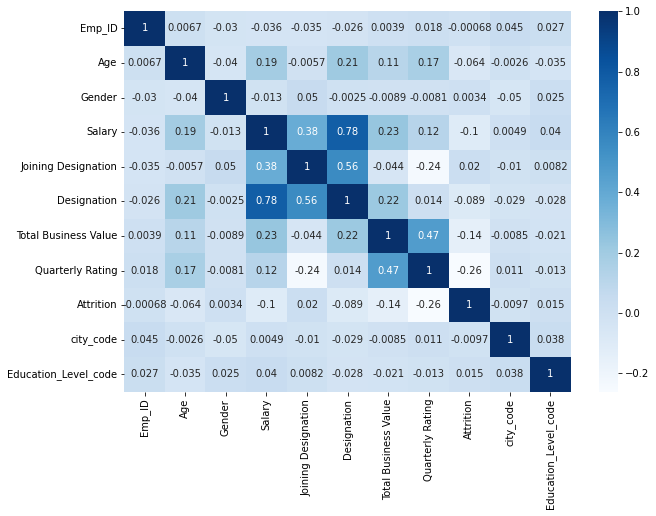

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True, cmap='Blues');

# Model and Optuna Optimization

In [28]:
import optuna

In [29]:
import catboost as cb
import optuna
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [30]:
# columns = [col for col in df.columns.to_list() if col not in ['Attrition','LastWorkingDate','Dateofjoining','MMM-YY']]
columns = [col for col in df.columns.to_list() if col not in ['Attrition','LastWorkingDate']]

In [31]:
data = df[columns]
target = df['Attrition']

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Emp_ID                19104 non-null  int64         
 2   Age                   19104 non-null  int64         
 3   Gender                19104 non-null  int64         
 4   Salary                19104 non-null  int64         
 5   Dateofjoining         19104 non-null  datetime64[ns]
 6   Joining Designation   19104 non-null  int64         
 7   Designation           19104 non-null  int64         
 8   Total Business Value  19104 non-null  int64         
 9   Quarterly Rating      19104 non-null  int64         
 10  city_code             19104 non-null  float64       
 11  Education_Level_code  19104 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(8)
memory usage: 1.7 MB


In [33]:
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(data,target, test_size=0.3)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = cb.CatBoostClassifier(**param)

    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=100)

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    f1 = f1_score(valid_y, pred_labels ,average='macro')
    return f1

In [34]:
%%time
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=8)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2021-11-22 15:43:14,771] A new study created in memory with name: no-name-b31366d6-771c-4d16-be27-1fa2c6079bf5
[I 2021-11-22 15:43:17,521] Trial 0 finished with value: 0.49181919772011484 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.05725504767686259, 'depth': 6, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.49181919772011484.
[I 2021-11-22 15:43:19,358] Trial 1 finished with value: 0.4862665194646692 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.044953250365321086, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.7988920458180633}. Best is trial 1 with value: 0.4862665194646692.
[I 2021-11-22 15:43:21,289] Trial 2 finished with value: 0.49674683603418485 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.07333726069335576, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.20152093863973364}. Best is trial 1 with value: 0.486266

Number of finished trials: 8
Best trial: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.04277906642678618, 'depth': 10, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}
CPU times: user 1min 33s, sys: 3.02 s, total: 1min 36s
Wall time: 52.8 s


Trial 5793 finished with value: 0.4765296803652968 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.019578786805971457, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 6.7937179307807645}. Best is trial 3516 with value: 0.4752357410967683.[0m 



In [35]:
#plot_optimization_histor: shows the scores from all trials as well as the best score so far at each point.

optuna.visualization.plot_optimization_history(study)

In [36]:
#plot_parallel_coordinate: interactively visualizes the hyperparameters and scores
optuna.visualization.plot_parallel_coordinate(study)

In [37]:
'''plot_slice: shows the evolution of the search. You can see where in the hyperparameter space your search
went and which parts of the space were explored more.'''

optuna.visualization.plot_slice(study)

In [38]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study)

In [39]:
#Visualize empirical distribution function
optuna.visualization.plot_edf(study)

In [40]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_bagging_temperature,params_boosting_type,params_bootstrap_type,params_colsample_bylevel,params_depth,params_objective,params_subsample,state
0,0,0.491819,2021-11-22 15:43:14.774354,2021-11-22 15:43:17.520979,0 days 00:00:02.746625,NaN,Plain,MVS,0.057255,6,Logloss,NaN,COMPLETE
1,1,0.486267,2021-11-22 15:43:17.522379,2021-11-22 15:43:19.358158,0 days 00:00:01.835779,NaN,Plain,Bernoulli,0.044953,12,Logloss,0.798892,COMPLETE
2,2,0.496747,2021-11-22 15:43:19.359588,2021-11-22 15:43:21.289146,0 days 00:00:01.929558,NaN,Plain,Bernoulli,0.073337,11,Logloss,0.201521,COMPLETE
3,3,0.478245,2021-11-22 15:43:21.290528,2021-11-22 15:43:30.443481,0 days 00:00:09.152953,NaN,Ordered,MVS,0.032840,3,Logloss,NaN,COMPLETE
4,4,0.479619,2021-11-22 15:43:30.444911,2021-11-22 15:43:39.158908,0 days 00:00:08.713997,NaN,Ordered,Bernoulli,0.048405,7,CrossEntropy,0.187035,COMPLETE
5,5,0.478482,2021-11-22 15:43:39.160324,2021-11-22 15:43:48.087987,0 days 00:00:08.927663,NaN,Ordered,Bernoulli,0.070335,8,CrossEntropy,0.132119,COMPLETE
6,6,0.478055,2021-11-22 15:43:48.089422,2021-11-22 15:43:57.062388,0 days 00:00:08.972966,NaN,Ordered,MVS,0.042779,10,CrossEntropy,NaN,COMPLETE
7,7,0.531825,2021-11-22 15:43:57.063807,2021-11-22 15:44:07.588381,0 days 00:00:10.524574,3.874934,Ordered,Bayesian,0.099824,4,Logloss,NaN,COMPLETE


In [41]:
26.7 *100*2

5340.0